# Make sure your data is not affected by selection function and dust extinction

In [47]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [48]:
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/A17G3-innergal_BJdistGaiaDR#'
tb = fits.open(path)
data = tb[1].data 

print(len(np.unique(data['APOGEE_ID']))) #dunno why we are getting less stars now... it didnt when I checked with the other file (4MIKE...)

29809


# Do some checks with the distances

In [49]:
from matplotlib.colors import LogNorm

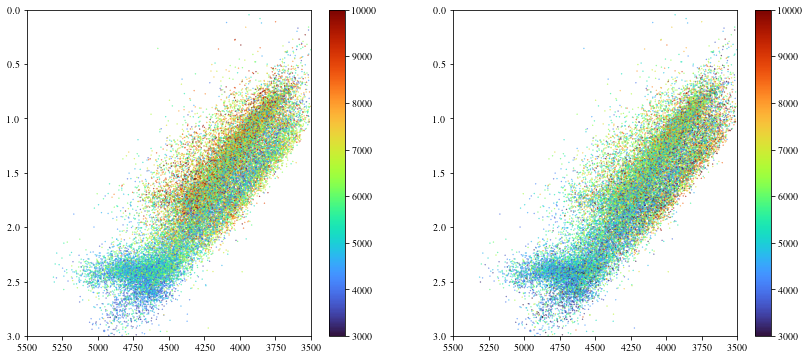

In [56]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(data['TEFF'],data['LOGG'],s=0.1,c=data['weighted_dist'],cmap=turbo,vmin=3000,vmax=10000)
plt.xlim(5500,3500)
plt.ylim(3,0)
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(data['TEFF'],data['LOGG'],s=0.1,c=data['GAIAEDR3_R_MED_PHOTOGEO'],cmap=turbo,vmin=3000,vmax=10000)
plt.xlim(5500,3500)
plt.ylim(3,0)
plt.colorbar()

In [28]:
def running_mean(xs,ys):
    
    rads = np.linspace(3e3,1.3e4,41)
    
    means = np.zeros((len(rads)))
    for indx, i in enumerate(rads[:-1]):
        mask_r = (xs>i)*(xs<rads[indx+1])
        means[indx] = np.nanmean(ys[mask_r])
    return means
        

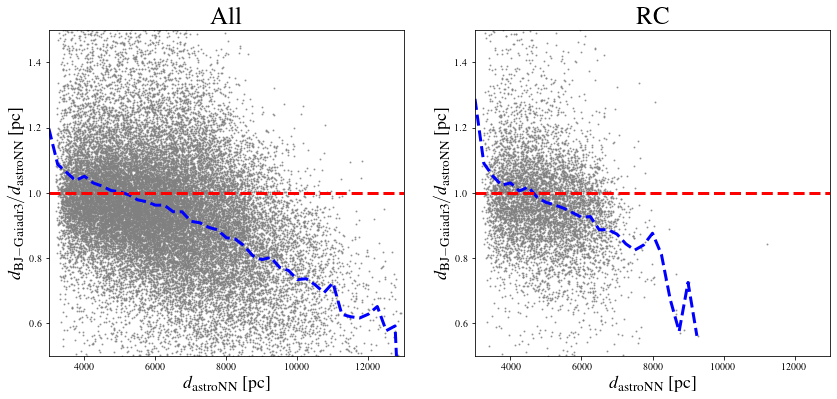

In [60]:
# plot distance over error vs distance for our sample
mask_plot = (data['weighted_dist']>0)&(data['weighted_dist']<1.5e4)

means_all = running_mean(data['weighted_dist'][mask_plot],data['GAIAEDR3_R_MED_PHOTOGEO'][mask_plot]/data['weighted_dist'][mask_plot])

plt.figure(figsize=(14,6),facecolor='white')
plt.subplot(1,2,1)
plt.title('All',fontsize=25)
plt.scatter(data['weighted_dist'][mask_plot],data['GAIAEDR3_R_MED_PHOTOGEO'][mask_plot]/data['weighted_dist'][mask_plot],s=1,c='gray',alpha=0.7)
plt.plot(np.linspace(3e3,1.3e4,41),means_all,color='b',lw=3,ls='dashed')
plt.xlabel(r'$d_{\mathrm{astroNN}}$ [pc]',fontsize=18)
plt.ylabel(r'$d_{\mathrm{BJ-Gaia dr3}}/d_{\mathrm{astroNN}}$ [pc]',fontsize=18)
plt.xlim(3e3,1.3e4)
plt.ylim(0.5,1.5)
plt.hlines(1,3e3,1.3e4,color='r',ls='dashed',lw=3)


plt.subplot(1,2,2)
mask_rc = (data['LOGG']>2.2)&(data['LOGG']<2.8)
means_rc = running_mean(data['weighted_dist'][mask_plot&mask_rc],data['GAIAEDR3_R_MED_PHOTOGEO'][mask_plot&mask_rc]/data['weighted_dist'][mask_plot&mask_rc])
plt.title('RC',fontsize=25)
plt.scatter(data['weighted_dist'][mask_rc&mask_plot],data['GAIAEDR3_R_MED_PHOTOGEO'][mask_rc&mask_plot]/data['weighted_dist'][mask_rc&mask_plot],s=1,c='gray',alpha=0.7)
plt.plot(np.linspace(3e3,1.3e4,41),means_rc,color='b',lw=3,ls='dashed')
plt.xlabel(r'$d_{\mathrm{astroNN}}$ [pc]',fontsize=18)
plt.ylabel(r'$d_{\mathrm{BJ-Gaia dr3}}/d_{\mathrm{astroNN}}$ [pc]',fontsize=18)
plt.xlim(3e3,1.3e4)
plt.ylim(0.5,1.5)
plt.hlines(1,3e3,1.3e4,color='r',ls='dashed',lw=3)


# Do it for stars in the plane 

In [38]:
z = data['Zgal']*8.178

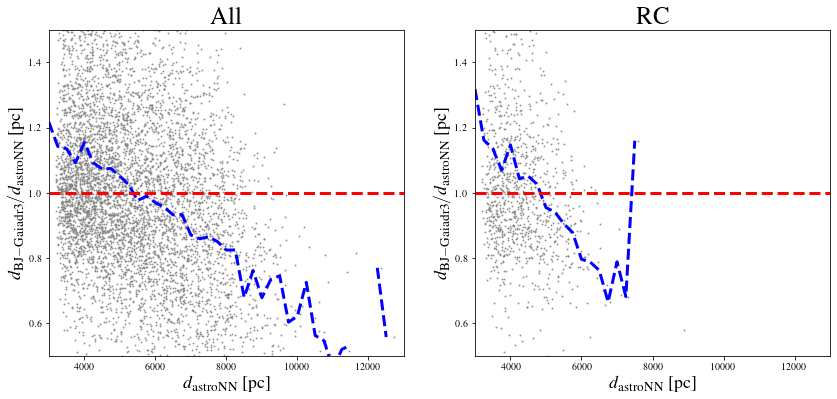

In [39]:
# plot distance over error vs distance for our sample
mask_z = np.abs(z)<0.3
means_all = running_mean(data['weighted_dist'][mask_plot&mask_z],data['rpgeo'][mask_plot&mask_z]/data['weighted_dist'][mask_plot&mask_z])

plt.figure(figsize=(14,6),facecolor='white')
mask_plot = (data['weighted_dist']>0)&(data['weighted_dist']<1.5e4)
plt.subplot(1,2,1)
plt.title('All',fontsize=25)
plt.scatter(data['weighted_dist'][mask_plot&mask_z],data['rpgeo'][mask_plot&mask_z]/data['weighted_dist'][mask_plot&mask_z],s=1,c='gray',alpha=0.7)
plt.plot(np.linspace(3e3,1.3e4,41),means_all,color='b',lw=3,ls='dashed')
plt.xlabel(r'$d_{\mathrm{astroNN}}$ [pc]',fontsize=18)
plt.ylabel(r'$d_{\mathrm{BJ-Gaia dr3}}/d_{\mathrm{astroNN}}$ [pc]',fontsize=18)
plt.xlim(3e3,1.3e4)
plt.ylim(0.5,1.5)
plt.hlines(1,3e3,1.3e4,color='r',ls='dashed',lw=3)


plt.subplot(1,2,2)
mask_rc = (data['LOGG']>2.2)&(data['LOGG']<2.8)
means_rc = running_mean(data['weighted_dist'][mask_plot&mask_rc&mask_z],data['rpgeo'][mask_plot&mask_rc&mask_z]/data['weighted_dist'][mask_plot&mask_rc&mask_z])
plt.title('RC',fontsize=25)
plt.scatter(data['weighted_dist'][mask_rc&mask_plot&mask_z],data['rpgeo'][mask_rc&mask_plot&mask_z]/data['weighted_dist'][mask_rc&mask_plot&mask_z],s=1,c='gray',alpha=0.7)
plt.plot(np.linspace(3e3,1.3e4,41),means_rc,color='b',lw=3,ls='dashed')
plt.xlabel(r'$d_{\mathrm{astroNN}}$ [pc]',fontsize=18)
plt.ylabel(r'$d_{\mathrm{BJ-Gaia dr3}}/d_{\mathrm{astroNN}}$ [pc]',fontsize=18)
plt.xlim(3e3,1.3e4)
plt.ylim(0.5,1.5)
plt.hlines(1,3e3,1.3e4,color='r',ls='dashed',lw=3)


# Do the same with the StarHorse distances

In [42]:
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/A17G3-innergal_BJdist_Starhorse'
tb = fits.open(path)
data = tb[1].data 

print(len(np.unique(data['APOGEE_ID_1']))) #dunno why we are getting less stars now... it didnt when I checked with the other file (4MIKE...)

28027


In [44]:
dist = data['dist50']*1e3
print(dist)

[9309.947  5543.2583 9084.158  ... 8018.921  6192.1987 5909.545 ]


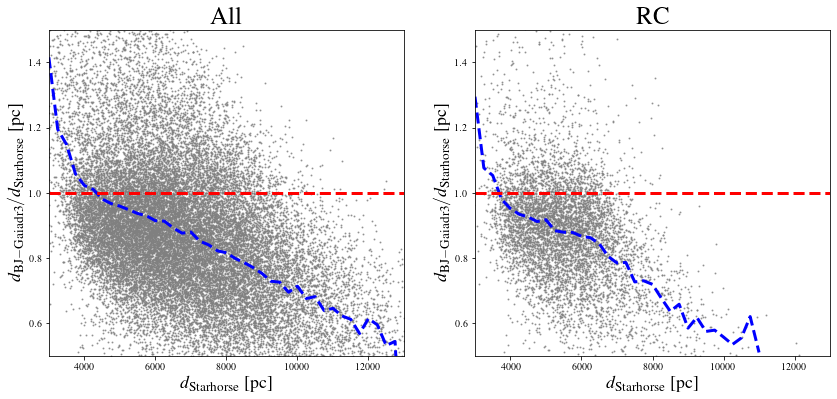

In [46]:
# plot distance over error vs distance for our sample
mask_plot = (dist>0)&(dist<1.5e4)

means_all = running_mean(dist[mask_plot],data['rpgeo'][mask_plot]/dist[mask_plot])

plt.figure(figsize=(14,6),facecolor='white')
plt.subplot(1,2,1)
plt.title('All',fontsize=25)
plt.scatter(dist[mask_plot],data['rpgeo'][mask_plot]/dist[mask_plot],s=1,c='gray',alpha=0.7)
plt.plot(np.linspace(3e3,1.3e4,41),means_all,color='b',lw=3,ls='dashed')
plt.xlabel(r'$d_{\mathrm{Starhorse}}$ [pc]',fontsize=18)
plt.ylabel(r'$d_{\mathrm{BJ-Gaia dr3}}/d_{\mathrm{Starhorse}}$ [pc]',fontsize=18)
plt.xlim(3e3,1.3e4)
plt.ylim(0.5,1.5)
plt.hlines(1,3e3,1.3e4,color='r',ls='dashed',lw=3)


plt.subplot(1,2,2)
mask_rc = (data['LOGG']>2.2)&(data['LOGG']<2.8)
means_rc = running_mean(dist[mask_plot&mask_rc],data['rpgeo'][mask_plot&mask_rc]/dist[mask_plot&mask_rc])
plt.title('RC',fontsize=25)
plt.scatter(dist[mask_rc&mask_plot],data['rpgeo'][mask_rc&mask_plot]/dist[mask_rc&mask_plot],s=1,c='gray',alpha=0.7)
plt.plot(np.linspace(3e3,1.3e4,41),means_rc,color='b',lw=3,ls='dashed')
plt.xlabel(r'$d_{\mathrm{Starhorse}}$ [pc]',fontsize=18)
plt.ylabel(r'$d_{\mathrm{BJ-Gaia dr3}}/d_{\mathrm{Starhorse}}$ [pc]',fontsize=18)
plt.xlim(3e3,1.3e4)
plt.ylim(0.5,1.5)
plt.hlines(1,3e3,1.3e4,color='r',ls='dashed',lw=3)
